In [1]:
# importing the Libraries.
import pandas as pd 
import numpy as np

In [2]:
# Loading the datasets.
twitter_data = pd.read_csv('/Users/tarakram/Documents/Sentimental_Analysis/Data/Twitter_Data.csv')
reddit_data = pd.read_csv('/Users/tarakram/Documents/Sentimental_Analysis/Data/Reddit_Data.csv')

In [3]:
# Display the twitter_data first 5
twitter_data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
twitter_data.shape # shape

(162980, 2)

In [5]:
# the shape is very huge, so we are taking 10000 samples randomly from the dataset.
data_1 = twitter_data.sample(n=10000)

In [6]:
data_1.shape # shape.

(10000, 2)

In [7]:
# Display the first 5 rows of teh reddit-dataset
reddit_data.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [8]:
reddit_data.shape # shape.

(37249, 2)

In [9]:
# the shape is very huge, so we are taking 10000 samples randomly from the dataset.
data_2= reddit_data.sample(n=10000)

In [10]:
# We are merging those two sample datasets, on the basis of category.
data = data_1.merge(data_2, on = 'category')

In [11]:
data.head() # our final dataset.

,clean_text,category,clean_comment
0,yes modi for another years pappu will make the...,0.0,terra 6000 oppure solo allegoria chi decide c...
1,yes modi for another years pappu will make the...,0.0,looks her eyebrows facepalm turns camera phir...
2,yes modi for another years pappu will make the...,0.0,bas keh diya bhai
3,yes modi for another years pappu will make the...,0.0,bik gaya media
4,yes modi for another years pappu will make the...,0.0,why the farmer asking amit shah questions thou...


## Data Cleaning.

In [12]:
data.shape # It is very huge 

(35587930, 3)

In [13]:
# the shape is very huge, so we are taking 10000 samples randomly from the dataset.
data = data.sample(n=10000) 

In [14]:
# checking for NUll values
data.isnull().sum() 

clean_text        0
category          0
clean_comment    31
dtype: int64

In [15]:
# Dropping those Null values.
data.dropna(axis = 0, inplace = True)

In [16]:
data.shape # shape.

(9969, 3)

In [17]:
data.head() # Display the head.

,clean_text,category,clean_comment
6669865,tajmahal built modi who inaugurated recently,0.0,like the nayak movie all over again with modi...
8506092,drdo has 100s such proposals and capabilities ...,0.0,100 correct
19042945,modi live interview public bharat arnav goswam...,1.0,harry was brave dumbledore was brave and ideal...
3427233,modi like cancer which spreading rapidly aggre...,0.0,sounds like nithyananda wrote his speech
15134311,whn reelected thn ill njoy your reaction any h...,-1.0,this saddening hear again and again they are s...


In [18]:
data.duplicated().sum()

0

In [19]:
data.info() # checking the info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9969 entries, 6669865 to 13820065
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   clean_text     9969 non-null   object 
 1   category       9969 non-null   float64
 2   clean_comment  9969 non-null   object 
dtypes: float64(1), object(2)
memory usage: 311.5+ KB


In [20]:
data['category'].value_counts() # checking the value Counts.

 1.0    5212
 0.0    3466
-1.0    1291
Name: category, dtype: int64

In [21]:
# converting the float into int.
data['category'] = data['category'].astype(int) 

In [22]:
data['category'].value_counts() # checking the value counts.

 1    5212
 0    3466
-1    1291
Name: category, dtype: int64

## Feature Engineering.

In [23]:
# creating a new column called text by concatnating the clean_text and clean-comment.
data['text'] = data['clean_text'] + data['clean_comment']

In [24]:
data.head() # display the first 5

,clean_text,category,clean_comment,text
6669865,tajmahal built modi who inaugurated recently,0,like the nayak movie all over again with modi...,tajmahal built modi who inaugurated recently l...
8506092,drdo has 100s such proposals and capabilities ...,0,100 correct,drdo has 100s such proposals and capabilities ...
19042945,modi live interview public bharat arnav goswam...,1,harry was brave dumbledore was brave and ideal...,modi live interview public bharat arnav goswam...
3427233,modi like cancer which spreading rapidly aggre...,0,sounds like nithyananda wrote his speech,modi like cancer which spreading rapidly aggre...
15134311,whn reelected thn ill njoy your reaction any h...,-1,this saddening hear again and again they are s...,whn reelected thn ill njoy your reaction any h...


In [25]:
# Removing those two columns that we have concatinated.
data.drop(['clean_text','clean_comment'], axis = 1, inplace = True)

In [26]:
data.head() # Display First 5 rows.

,category,text
6669865,0,tajmahal built modi who inaugurated recently l...
8506092,0,drdo has 100s such proposals and capabilities ...
19042945,1,modi live interview public bharat arnav goswam...
3427233,0,modi like cancer which spreading rapidly aggre...
15134311,-1,whn reelected thn ill njoy your reaction any h...


In [27]:
# rename the columns
data.rename(columns={'category': 'target'}, inplace = True)

In [57]:
data

,target,text
0,0,tajmahal built modi who inaugurated recently l...
1,0,drdo has 100s such proposals and capabilities ...
2,1,modi live interview public bharat arnav goswam...
3,0,modi like cancer which spreading rapidly aggre...
4,-1,whn reelected thn ill njoy your reaction any h...
...,...,...
9964,1,this you because you love the things you reall...
9965,-1,how mission shakti could the achievement modi ...
9966,-1,mister modi and batch intelligence chief going...
9967,0,proudly next india modisource for


In [51]:
data = data.reset_index().rename(columns = {'index': 'ID'})

In [56]:
data.drop('ID', axis = 1, inplace = True)

## EDA

In [29]:
# Lets perform some EDA to better understand the data.
# import the needed libraries for the EDA.
import seaborn as sns
import matplotlib.pyplot as plt

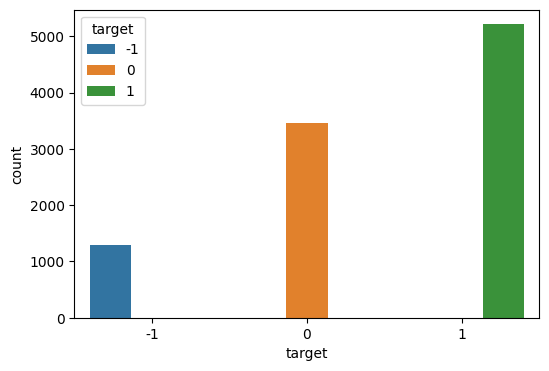

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(data = data, x = 'target', hue = 'target')
plt.show()

Insights - Most of our data is positve and neutral, so we have the imbalanced dataset.

## Data Pre-Processing.

In [77]:
data.head()

,target,text
0,0,tajmahal built modi who inaugurated recently l...
1,0,drdo has 100s such proposals and capabilities ...
2,1,modi live interview public bharat arnav goswam...
3,0,modi like cancer which spreading rapidly aggre...
4,-1,whn reelected thn ill njoy your reaction any h...


In [78]:
data['text'] = data['text'].str.lower() # convert into lowercase.

In [82]:
# Removing spcial characters
data['text'] = data['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.split().apply(lambda x: ' '.join(x))

In [81]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [80]:
# Removing the punctuation.
data['text'] = data['text'].str.replace('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', regex=True).str.split().apply(lambda x: ' '.join(x))

## NLTK.

In [85]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [84]:
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [86]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [87]:
data['text'] = data['text'].apply(stem)

In [88]:
data.head(3)

,target,text
0,0,tajmah built modi inaugur recent like nayak mo...
1,0,drdo 100 propos capabl prerog modi govt decid ...
2,1,modi live interview public bharat arnav goswam...


In [98]:
# first Lets explore the nltk.
text_ex = data['text'][0]
text_ex

'tajmah built modi inaugur recent like nayak movi modi amrish puri'

In [91]:
# See How tokenize Works.
tokens = nltk.word_tokenize(text_ex)
tokens

['sure',
 'naara',
 'histori',
 'good',
 'narendra',
 'modi',
 'arun',
 'jaitley',
 'know',
 'econom',
 'subramanian',
 'swami',
 'niic',
 'less',
 'retarded',
 'rindia',
 'hope']

## VADER sentiment (SentimentIntensityanalyzer)


The biggest Advantage of the sentimentintensityanalyzer is that it gives the score of positive, neutral and negative, that is what we want to in our probem statement.

In [92]:
# importing the sentimentanalyzer.
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [93]:
# We have created a object called "sia". lets see how it works.

In [94]:
sia.polarity_scores('I Love you!')

{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}

In [95]:
sia.polarity_scores('I Hate you!')

{'neg': 0.8, 'neu': 0.2, 'pos': 0.0, 'compound': -0.6114}

We can see our "sia", is working pretty well, which it is defining the negative, postive and neutral.

In [99]:
# Lets test into our data.
sia.polarity_scores(text_ex)

{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound': 0.3612}

It is showing that it is neutral, and our target also neutral, it is working fine.

In [97]:
# Run the polarity score on the entire dataset
res = {}
myid = 0
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['text']
    myid +=1
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/9969 [00:00<?, ?it/s]

In [100]:
df = pd.DataFrame(res).T
df

,neg,neu,pos,compound
1,0.000,0.800,0.200,0.3612
2,0.000,1.000,0.000,0.0000
3,0.088,0.680,0.231,0.7430
4,0.402,0.326,0.272,-0.6808
5,0.287,0.658,0.055,-0.9382
...,...,...,...,...
9965,0.036,0.648,0.316,0.9670
9966,0.125,0.751,0.124,-0.4735
9967,0.082,0.775,0.143,0.3818
9968,0.000,1.000,0.000,0.0000


In [101]:
df = df.reset_index().rename(columns = {'index': 'ID'})
df = df.merge(data,how = 'left',left_index=True, right_index=True)

In [102]:
df.drop('ID', axis = 1, inplace = True)

In [103]:
df

,neg,neu,pos,compound,target,text
0,0.000,0.800,0.200,0.3612,0,tajmah built modi inaugur recent like nayak mo...
1,0.000,1.000,0.000,0.0000,0,drdo 100 propos capabl prerog modi govt decid ...
2,0.088,0.680,0.231,0.7430,1,modi live interview public bharat arnav goswam...
3,0.402,0.326,0.272,-0.6808,0,modi like cancer spread rapidli aggress chemo ...
4,0.287,0.658,0.055,-0.9382,-1,whn reelect thn ill njoy reaction polici gud t...
...,...,...,...,...,...,...
9964,0.036,0.648,0.316,0.9670,1,love thing realli alway look real desir challe...
9965,0.125,0.751,0.124,-0.4735,-1,mission shakti could achiev modi govern unfort...
9966,0.082,0.775,0.143,0.3818,-1,mister modi batch intellig chief go elect duti...
9967,0.000,1.000,0.000,0.0000,0,proudli next india modisourc


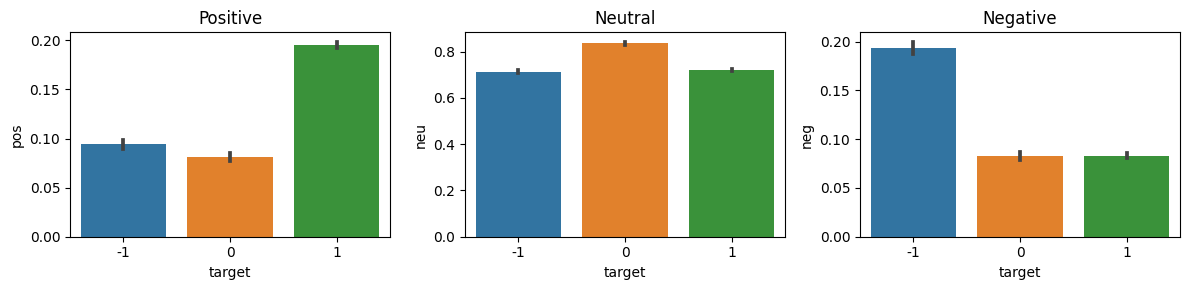

In [110]:
# Lets plot our VADER Results.
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=df, x='target', y='pos', ax=axs[0])
sns.barplot(data=df, x='target', y='neu', ax=axs[1])
sns.barplot(data=df, x='target', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [111]:
# Here we can see the total reviews on each graph.

In [115]:
df['target'].value_counts()

 1    5212
 0    3466
-1    1291
Name: target, dtype: int64

## Roberta Pretrained Model.

Roberta is a Pretrained model on English language using a masked language modeling (MLM) objective that is developed by Hugging Face.

In [120]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax